In [144]:
import numpy as np
import matplotlib.pyplot as plt
import imageio 
from scipy.fftpack import fftn, fftshift, fft2, ifft2, ifftshift


In [145]:
#Normalization Values to int[0,255]
def normalization(img):
  min = np.min(img)
  max = np.max(img)
  img = np.asarray(((img - min)/(max-min))*255)
  return img

In [146]:
#Comparison with original image usin the Root mean square error
def error(img, output):
  RMSE = np.sqrt(np.square(np.subtract(img,output)).mean())
  print(f'{RMSE:.4f}')

In [147]:
def gaussian_filter (k, sigma):
    arx = np.arange((-k // 2 ) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx , arx)
    filt = np.exp(-(1/2)*(np.square(x) + np.square(y)) / np.square(sigma))
    return filt/np.sum(filt)

In [148]:
file_name = "monkey.jpg"
k = 3
sigma = 2.0
gamma = 0.1

In [149]:
f = imageio.imread(file_name)

In [159]:
h = gaussian_filter(k, sigma)

In [163]:
print(len(h))

3


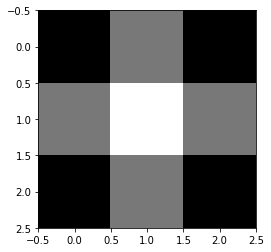

In [142]:
plt.imshow(h, cmap="gray")

In [151]:
laplace = np.asarray([[0, -1, 0],[-1,4,-1],[0,-1,0]])

In [152]:
laplace = np.pad(laplace, ((f.shape[0] - laplace.shape[0]) // 2, (f.shape[1] - laplace.shape[1]+1) // 2))
h = np.pad(h, ((f.shape[0] - h.shape[0]) // 2, (f.shape[1] - h.shape[1] + 1)//2))

In [153]:
a = int(f.shape[0]//2 - h.shape[0]//2)
h_pad = np.pad(h, (a,a), 'constant', constant_values=(0))

In [160]:
h = fftshift(fft2(h))

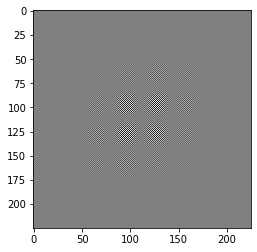

In [155]:
plt.imshow(h.real, cmap="gray")

In [156]:
img_F = fftshift(fft2(f))

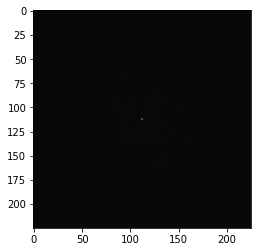

In [134]:
plt.imshow(img_F.real, cmap="gray")

In [157]:
h = np.conjugate(h)

In [162]:
h * np.conjugate(h)

array([[3.26152423e-06+0.j, 1.80596906e-03+0.j, 3.26152423e-06+0.j],
       [1.80596906e-03+0.j, 1.00000000e+00+0.j, 1.80596906e-03+0.j],
       [3.26152423e-06+0.j, 1.80596906e-03+0.j, 3.26152423e-06+0.j]])

In [161]:
h**2

array([[-1.63076211e-06+2.82456284e-06j, -9.02984528e-04-1.56401508e-03j,
         3.26152423e-06-2.15383913e-20j],
       [-9.02984528e-04-1.56401508e-03j,  1.00000000e+00-0.00000000e+00j,
        -9.02984528e-04+1.56401508e-03j],
       [ 3.26152423e-06+2.15383913e-20j, -9.02984528e-04+1.56401508e-03j,
        -1.63076211e-06-2.82456284e-06j]])

In [158]:
h**2

array([[0.00585187-1.63457630e-04j, 0.00582401-3.25612870e-04j,
        0.00577083-4.84590284e-04j, ..., 0.00578211+3.23270270e-04j,
        0.00583083+1.62869935e-04j, 0.00585416-2.12364728e-18j],
       [0.00582401-3.25612870e-04j, 0.00579175-4.86346984e-04j,
        0.00573436-6.43211488e-04j, ..., 0.00576807+1.61116810e-04j,
        0.00581214-1.69280955e-17j, 0.00583083-1.62869935e-04j],
       [0.00577083-4.84590284e-04j, 0.00573436-6.43211488e-04j,
        0.00567305-7.97295768e-04j, ..., 0.00572881-9.45354792e-18j,
        0.00576807-1.61116810e-04j, 0.00578211-3.23270270e-04j],
       ...,
       [0.00578211+3.23270270e-04j, 0.00576807+1.61116810e-04j,
        0.00572881+9.45354792e-18j, ..., 0.00567305+7.97295768e-04j,
        0.00573436+6.43211488e-04j, 0.00577083+4.84590284e-04j],
       [0.00583083+1.62869935e-04j, 0.00581214+1.69280955e-17j,
        0.00576807-1.61116810e-04j, ..., 0.00573436+6.43211488e-04j,
        0.00579175+4.86346984e-04j, 0.00582401+3.25612870e-04j]

In [124]:
final = (np.abs(h)/(np.abs(h) ** 2 + gamma * np.abs(h) ** 2)) * img_F

In [125]:
final = np.abs(ifft2(ifftshift(final)))

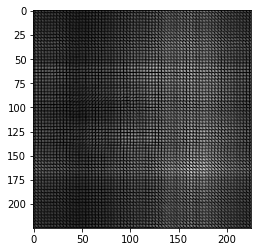

In [126]:
plt.imshow(final, cmap="gray")

In [127]:
final = np.clip(final, 0, 255).astype(np.uint8)

In [128]:
print(final)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


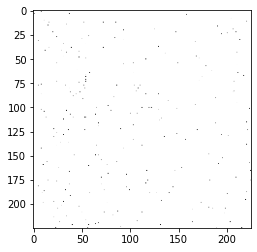

In [129]:
plt.imshow(final, cmap="gray")

In [130]:
error(f,final)

6.3213
